## Adult income
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [852]:
# imports

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer, KNNImputer 

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from category_encoders import BinaryEncoder

from sklearn.preprocessing import OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler

In [867]:
adult = pd.read_csv('adult.csv',na_values=['?'])
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Understanding Data

In [854]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [855]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [856]:
# check dtypes
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [857]:
adult['education'].nunique(), adult['education'].unique()

(16,
 array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object))

In [858]:
adult['educational-num'].nunique(), adult['educational-num'].unique()

(16,
 array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
       dtype=int64))

In [859]:
adult = adult.drop(columns=['education'],axis=1)
adult.shape

(48842, 14)

In [860]:
# change dtype for cols (educational-num )
# adult['fnlwgt'] = adult['fnlwgt'].astype('object')
adult['educational-num'] = adult['educational-num'].astype('object')
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   educational-num  48842 non-null  object
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [861]:
# Describe Numerical columns

adult.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [862]:
# Describe Categorical columns

adult.describe(include='object')

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [863]:
cat_cols = adult.select_dtypes(include='object').columns

for cat in cat_cols:
    print(f'{cat} has number of uniques :',adult[cat].nunique())
    print(f'{cat} has uniques :',adult[cat].unique())
    print(f"\n{'='*100}\n")

workclass has number of uniques : 8
workclass has uniques : ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


educational-num has number of uniques : 16
educational-num has uniques : [7 9 12 10 6 15 4 13 14 16 3 11 5 8 2 1]


marital-status has number of uniques : 7
marital-status has uniques : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation has number of uniques : 14
occupation has uniques : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


relationship has number of uniques : 6
relationship has uniques : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


race has number of uniques : 5
race has uniques : ['Black' 'White

In [864]:
for cat in cat_cols:
    print(f"{cat} column Count of each unique")
    print(adult[cat].value_counts())
    print(f"\n{'='*100}\n")

workclass column Count of each unique
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


educational-num column Count of each unique
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64


marital-status column Count of each unique
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


occupation column Count of each unique
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales   

In [865]:
adult.describe(include='object')

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


## Extract Features + EDA 

In [513]:
# no features to extract 

In [514]:
num_cols = adult.select_dtypes(include='number').columns
num_cols

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

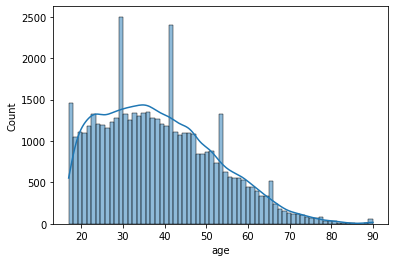

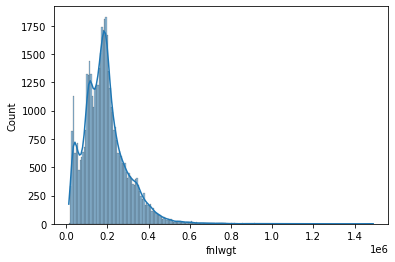

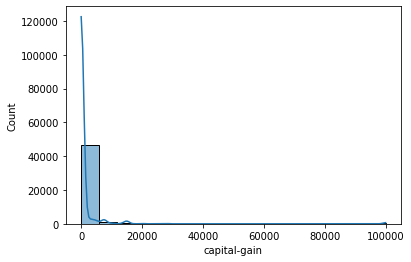

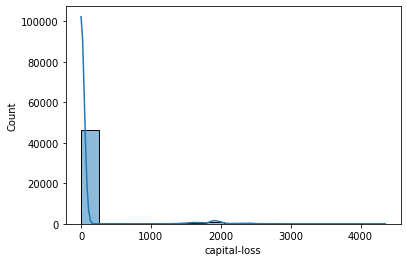

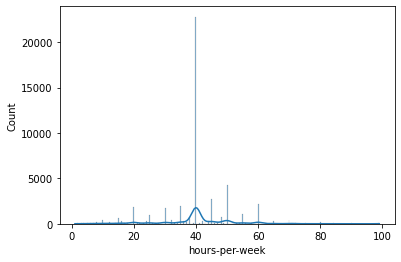

In [515]:
for col in num_cols :
    sns.histplot(adult[col],kde=True)
    plt.show()

In [516]:
workclass = pd.DataFrame(adult['workclass'].value_counts())
workclass
pd.DataFrame(adult['workclass'].value_counts())

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [517]:
px.pie(workclass,names=workclass.index,title='WorkClass',values=workclass['workclass'].values
       ,height=500,width=500,hole=0.3,color_discrete_sequence=px.colors.plotlyjs.Portland)

<AxesSubplot:xlabel='workclass', ylabel='count'>

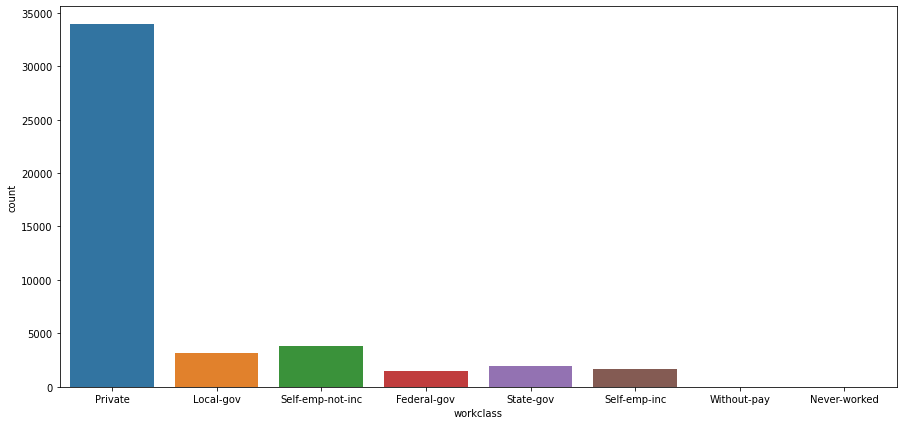

In [518]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x=adult['workclass'])

In [519]:
for cat in cat_cols:
    if adult[cat].nunique() <= 8:
        data = pd.DataFrame(adult[cat].value_counts())
        fig = px.pie(data,names=data.index,title=cat,values=data[cat].values,height=500,width=500,hole=0.3,color_discrete_sequence=px.colors.plotlyjs.Portland)
        fig.show()

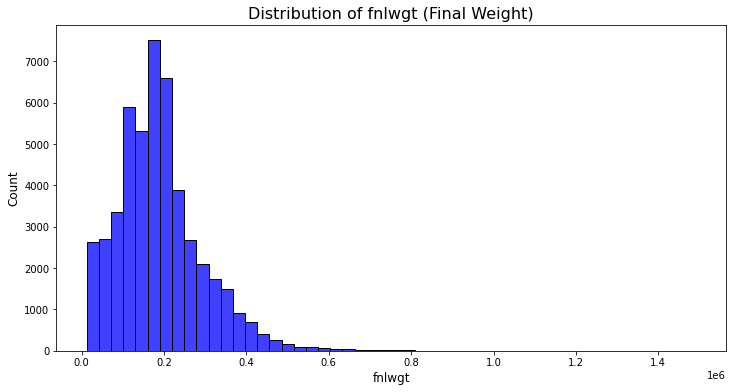

In [520]:
plt.figure(figsize=(12, 6))

# Plot a histogram for fnlwgt
sns.histplot(adult['fnlwgt'], bins=50, kde=False, color='blue')

# Add labels and title
plt.title('Distribution of fnlwgt (Final Weight)', fontsize=16)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

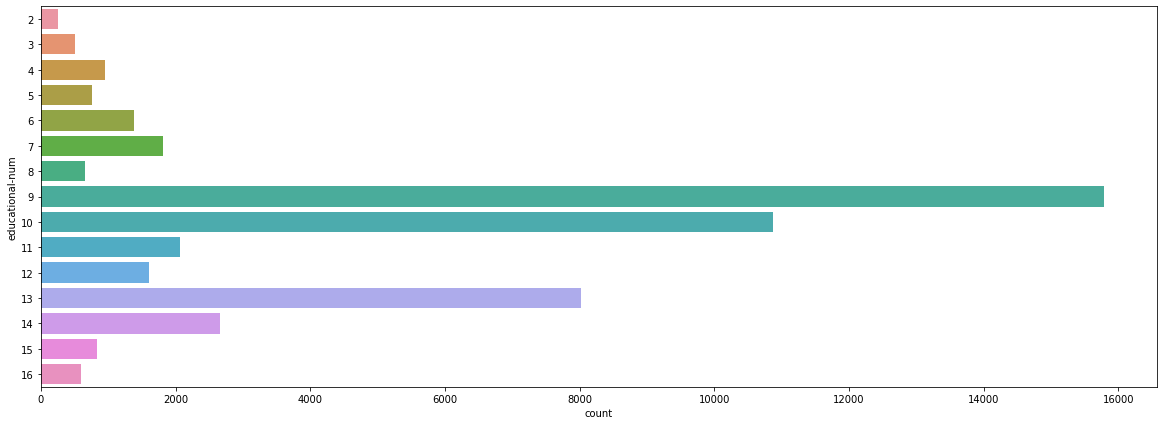

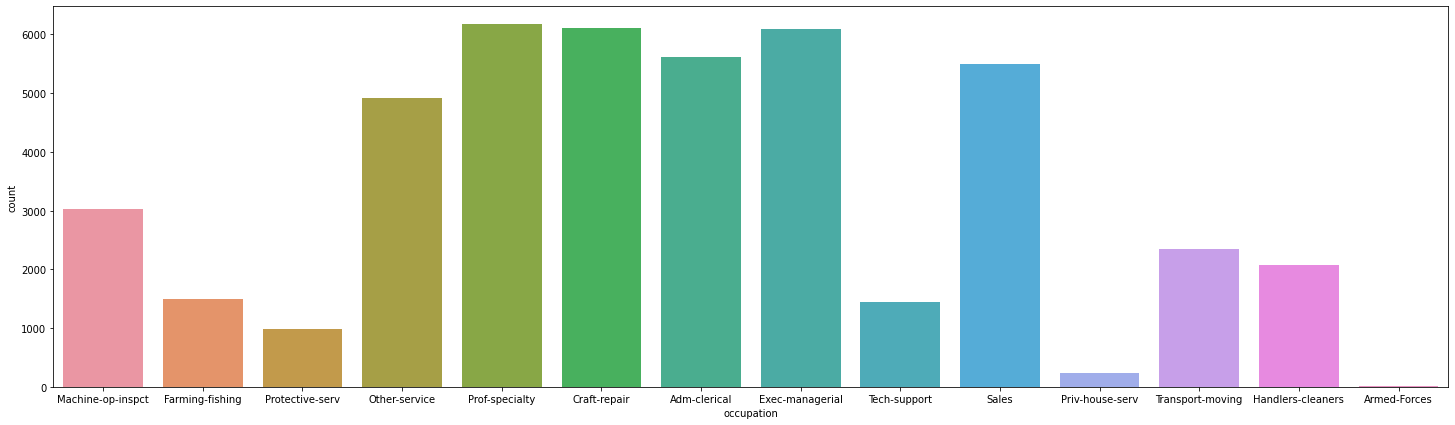

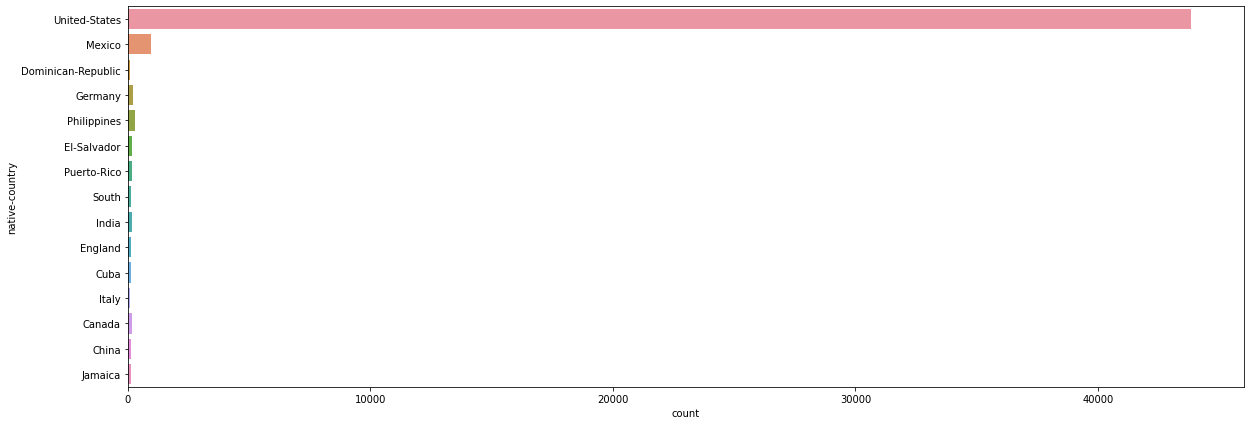

In [521]:
cat_cols = adult.select_dtypes(include='object').columns

for cat in cat_cols:
    if adult[cat].nunique() > 8 and adult[cat].nunique() <= 15:
        plt.figure(figsize=(25,7))
        sns.countplot(data=adult,x=adult[cat])
    elif adult[cat].nunique() > 15:
        plt.figure(figsize=(20,7))
        top_df = adult[cat].value_counts().head(15).index
        filter_df = adult[adult[cat].isin(top_df)]
        filter_df
        sns.countplot(data=filter_df,y=cat) 

In [522]:
adult_df = adult.select_dtypes('number')
adult_df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30
...,...,...,...,...,...
48837,27,257302,0,0,38
48838,40,154374,0,0,40
48839,58,151910,0,0,40
48840,22,201490,0,0,20


In [523]:
# correlation
adult.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.003706,-0.004366,-0.013519
capital-gain,0.077229,-0.003706,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.082157,0.054467,1.000000


<AxesSubplot:>

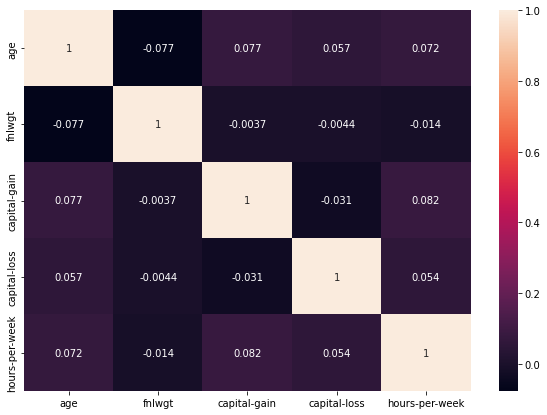

In [524]:
plt.figure(figsize=(10,7))
sns.heatmap(adult_df.corr(),annot=True)

In [868]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


#### count income for each workclass

In [526]:
adult.groupby(by= ['workclass','income'])[['age']].count().sort_values(by=['workclass','income'],ascending=False)

age
workclass        income       
Without-pay      >50K        2
                 <=50K      19
State-gov        >50K      530
                 <=50K    1451
Self-emp-not-inc >50K     1077
                 <=50K    2785
Self-emp-inc     >50K      938
                 <=50K     757
Private          >50K     7387
                 <=50K   26519
Never-worked     <=50K      10
Local-gov        >50K      927
                 <=50K    2209
Federal-gov      >50K      561
                 <=50K     871

In [527]:
cat_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [528]:
adult.groupby(['native-country','income'])[['age']].count().sort_values(by=['native-country','income'],ascending=False)

age
native-country income       
Yugoslavia     >50K        8
               <=50K      15
Vietnam        >50K        7
               <=50K      79
United-States  >50K    10694
...                      ...
China          <=50K      86
Canada         >50K       63
               <=50K     119
Cambodia       >50K        9
               <=50K      19

[81 rows x 1 columns]

In [529]:
num_cols

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

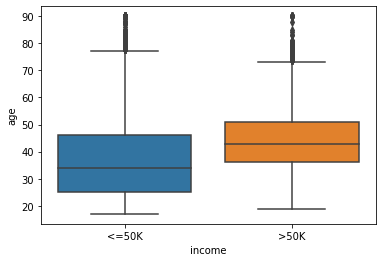

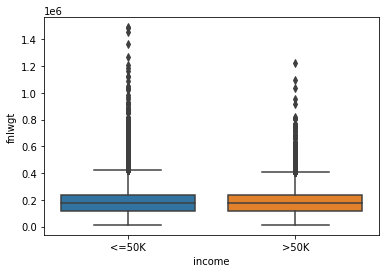

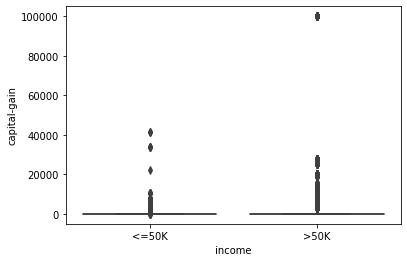

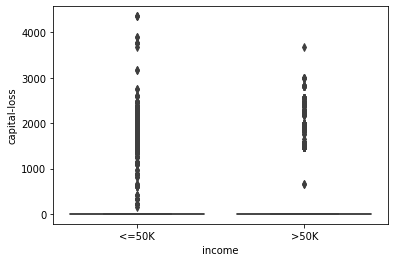

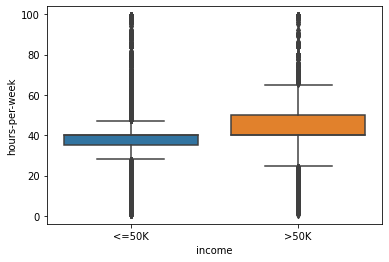

In [530]:
for col in num_cols:
    sns.boxplot(y=adult[col], x=adult["income"])
    plt.show()

#### Is there a significant difference in income between males and females?

In [531]:
adult.groupby(['gender','income'])[['age']].count().sort_values(by=['gender','income'],ascending=False)

age
gender income       
Male   >50K     9918
       <=50K   22732
Female >50K     1769
       <=50K   14423

<AxesSubplot:xlabel='gender', ylabel='count'>

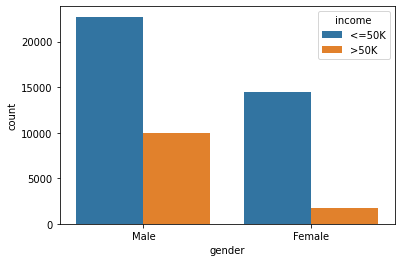

In [532]:
sns.countplot(data=adult,x='gender',hue='income')

#### How does the level of education impact income?

In [869]:
adult.groupby(['education','income'])[['age']].count().sort_values(by=['education','income'],ascending=False)

age
education    income       
Some-college >50K     2063
             <=50K    8815
Prof-school  >50K      617
             <=50K     217
Preschool    >50K        1
             <=50K      82
Masters      >50K     1459
             <=50K    1198
HS-grad      >50K     2503
             <=50K   13281
Doctorate    >50K      431
             <=50K     163
Bachelors    >50K     3313
             <=50K    4712
Assoc-voc    >50K      522
             <=50K    1539
Assoc-acdm   >50K      413
             <=50K    1188
9th          >50K       41
             <=50K     715
7th-8th      >50K       62
             <=50K     893
5th-6th      >50K       27
             <=50K     482
1st-4th      >50K        8
             <=50K     239
12th         >50K       48
             <=50K     609
11th         >50K       92
             <=50K    1720
10th         >50K       87
             <=50K    1302

<AxesSubplot:xlabel='education', ylabel='count'>

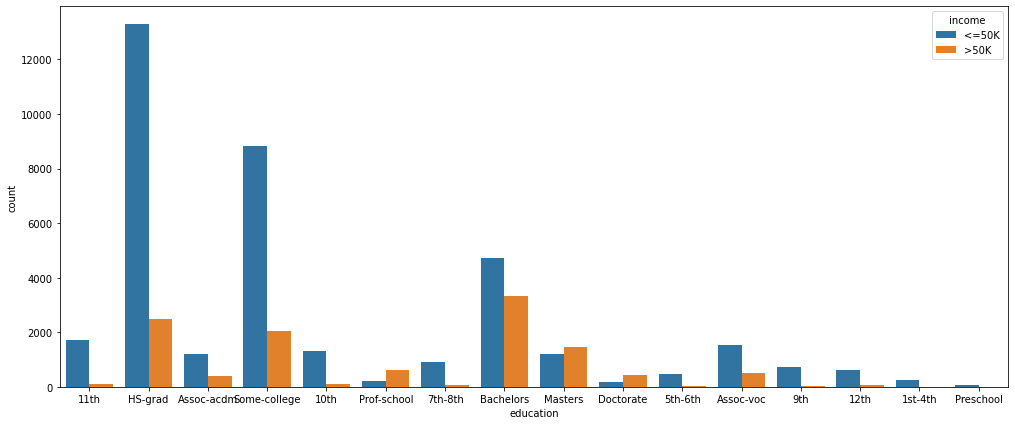

In [108]:
plt.figure(figsize=(17,7))
sns.countplot(data=adult,x='education' , hue='income')

#### Do race affect income?

In [109]:
adult.groupby(['race','income'])[['age']].count().sort_values(by=['race','income'],ascending=False)

age
race               income       
White              >50K    10607
                   <=50K   31155
Other              >50K       50
                   <=50K     356
Black              >50K      566
                   <=50K    4119
Asian-Pac-Islander >50K      409
                   <=50K    1110
Amer-Indian-Eskimo >50K       55
                   <=50K     415

<AxesSubplot:xlabel='race', ylabel='count'>

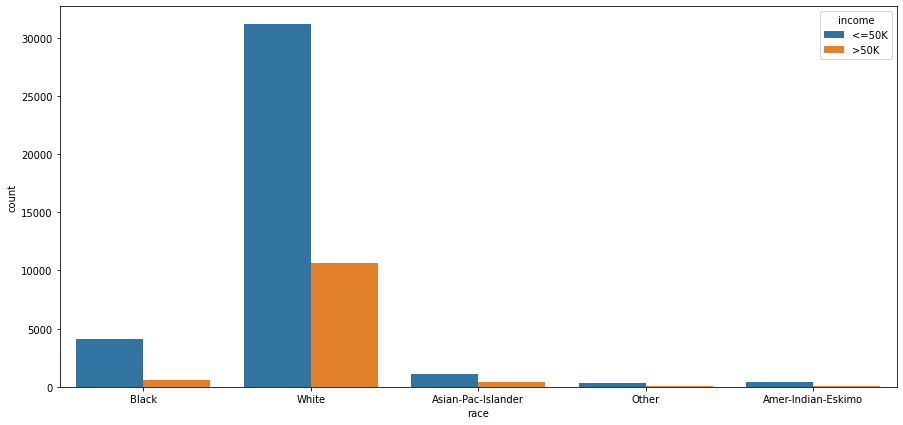

In [110]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='race',hue='income')

#### Which occupations are most likely to yield a high income?

In [111]:
adult.groupby(['occupation','income'])[['age']].count().sort_values(by=['occupation','income'],ascending=False)

age
occupation        income      
Transport-moving  >50K     481
                  <=50K   1874
Tech-support      >50K     420
                  <=50K   1026
Sales             >50K    1475
                  <=50K   4029
Protective-serv   >50K     308
                  <=50K    675
Prof-specialty    >50K    2784
                  <=50K   3388
Priv-house-serv   >50K       3
                  <=50K    239
Other-service     >50K     204
                  <=50K   4719
Machine-op-inspct >50K     372
                  <=50K   2650
Handlers-cleaners >50K     138
                  <=50K   1934
Farming-fishing   >50K     173
                  <=50K   1317
Exec-managerial   >50K    2908
                  <=50K   3178
Craft-repair      >50K    1383
                  <=50K   4729
Armed-Forces      >50K       5
                  <=50K     10
Adm-clerical      >50K     768
                  <=50K   4843

<AxesSubplot:xlabel='occupation', ylabel='count'>

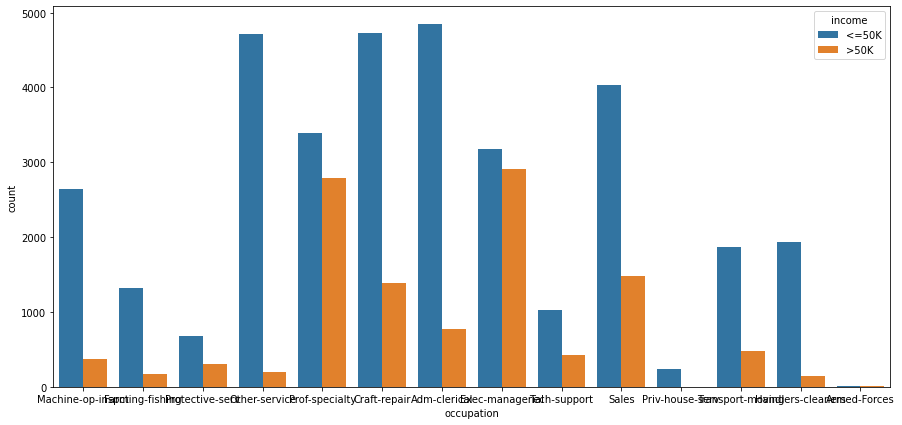

In [112]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='occupation',hue='income')

In [302]:
cat_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

#### Does marital status correlate with higher income?

In [114]:
adult.groupby(['marital-status','income'])[['age']].count().sort_values(by=['marital-status','income'],ascending=False)

age
marital-status        income       
Widowed               >50K      128
                      <=50K    1390
Separated             >50K       99
                      <=50K    1431
Never-married         >50K      733
                      <=50K   15384
Married-spouse-absent >50K       58
                      <=50K     570
Married-civ-spouse    >50K     9984
                      <=50K   12395
Married-AF-spouse     >50K       14
                      <=50K      23
Divorced              >50K      671
                      <=50K    5962

<AxesSubplot:xlabel='marital-status', ylabel='count'>

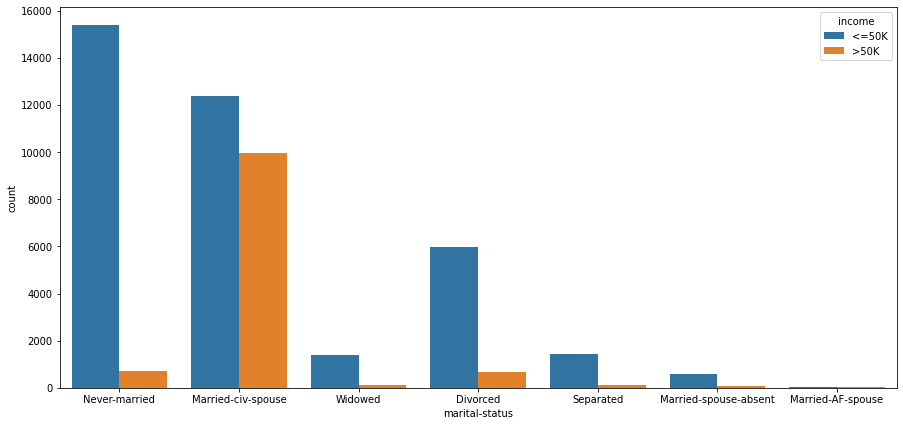

In [115]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='marital-status',hue='income')

#### How does the country of origin affect income levels?

In [116]:
adult.groupby(['native-country','income'])[['age']].count().sort_values(by=['native-country','income'],ascending=False)

age
native-country income       
Yugoslavia     >50K        8
               <=50K      15
Vietnam        >50K        7
               <=50K      79
United-States  >50K    10694
...                      ...
China          <=50K      86
Canada         >50K       63
               <=50K     119
Cambodia       >50K        9
               <=50K      19

[81 rows x 1 columns]

<AxesSubplot:xlabel='count', ylabel='native-country'>

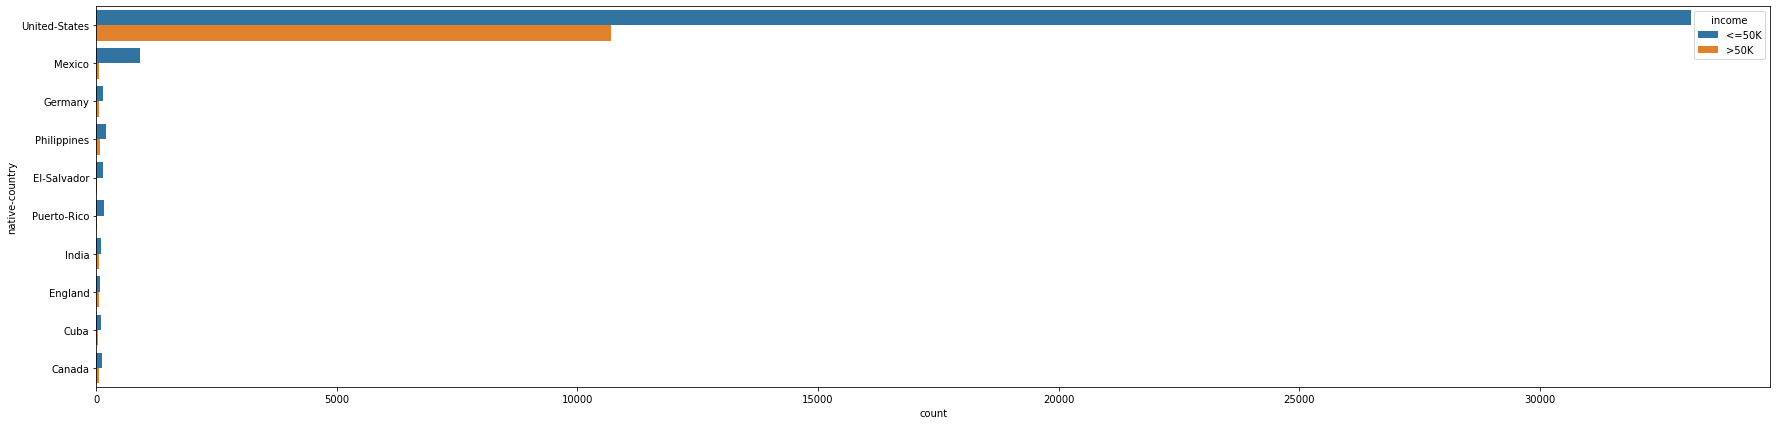

In [284]:
plt.figure(figsize=(30,7))
top_df = adult['native-country'].value_counts().head(10).index
filter_df = adult[adult['native-country'].isin(top_df)]
sns.countplot(data=filter_df,y='native-country',hue='income')

In [118]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Does working more hours per week increase the chances of earning more than $50K?

In [119]:
adult.groupby(['hours-per-week','income'])[['age']].count().sort_values(by=['hours-per-week','income'],ascending=False)

age
hours-per-week income     
99             >50K     41
               <=50K    96
98             >50K      3
               <=50K    11
97             >50K      1
...                    ...
3              <=50K    56
2              >50K     12
               <=50K    41
1              >50K      3
               <=50K    24

[181 rows x 1 columns]

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

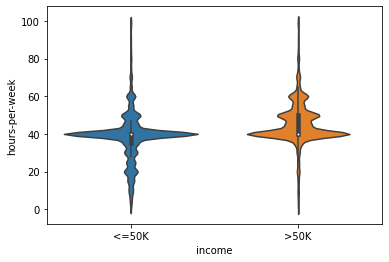

In [120]:
sns.violinplot(y=adult['hours-per-week'], x=adult["income"])

#### At what age do people generally start earning above $50K?

In [121]:
adult.groupby('income')[['age']].count().sort_values(by='age',ascending=False)

,age
income,
<=50K,37155
>50K,11687


<AxesSubplot:xlabel='income', ylabel='age'>

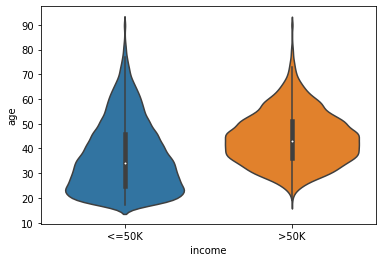

In [122]:
sns.violinplot(y=adult['age'], x=adult["income"])

In [870]:
adult.groupby(['fnlwgt','income'])[['age']].count().sort_values(by=['fnlwgt','income'],ascending=False)

age
fnlwgt  income     
1490400 <=50K     1
1484705 <=50K     1
1455435 <=50K     1
1366120 <=50K     1
1268339 <=50K     1
...             ...
13862   <=50K     1
13769   >50K      1
        <=50K     2
13492   <=50K     1
12285   <=50K     1

[32732 rows x 1 columns]

<AxesSubplot:xlabel='count', ylabel='fnlwgt'>

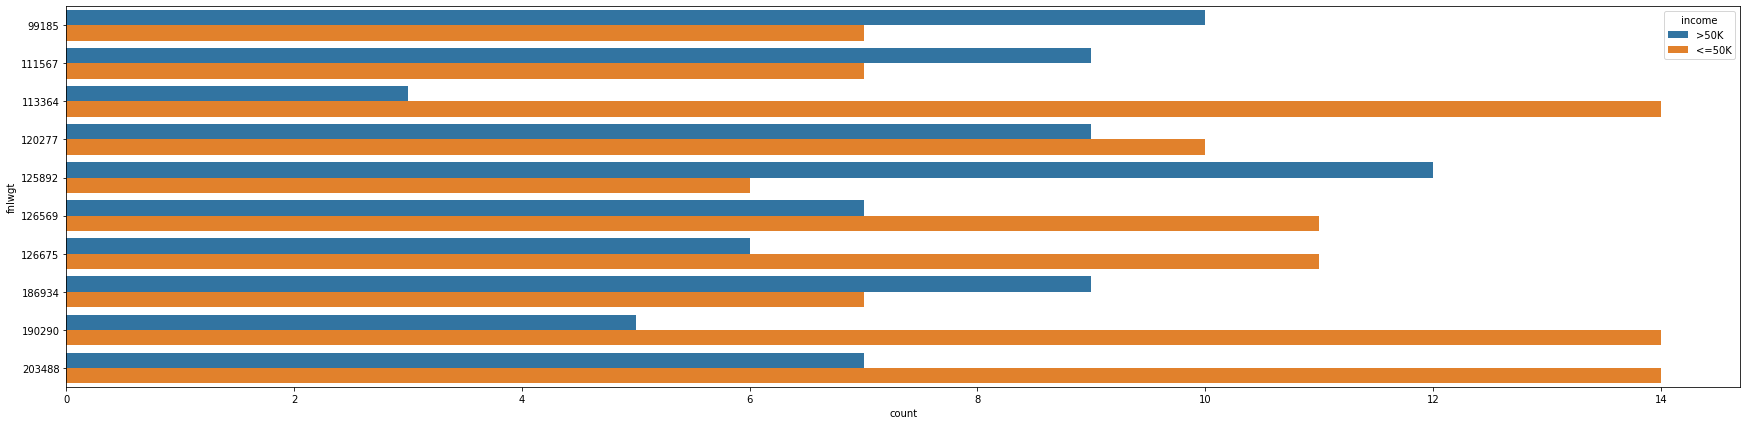

In [871]:
plt.figure(figsize=(30,7))
top_df = adult['fnlwgt'].value_counts().head(10).index
filter_df = adult[adult['fnlwgt'].isin(top_df)]
sns.countplot(data=filter_df,y='fnlwgt',hue='income')

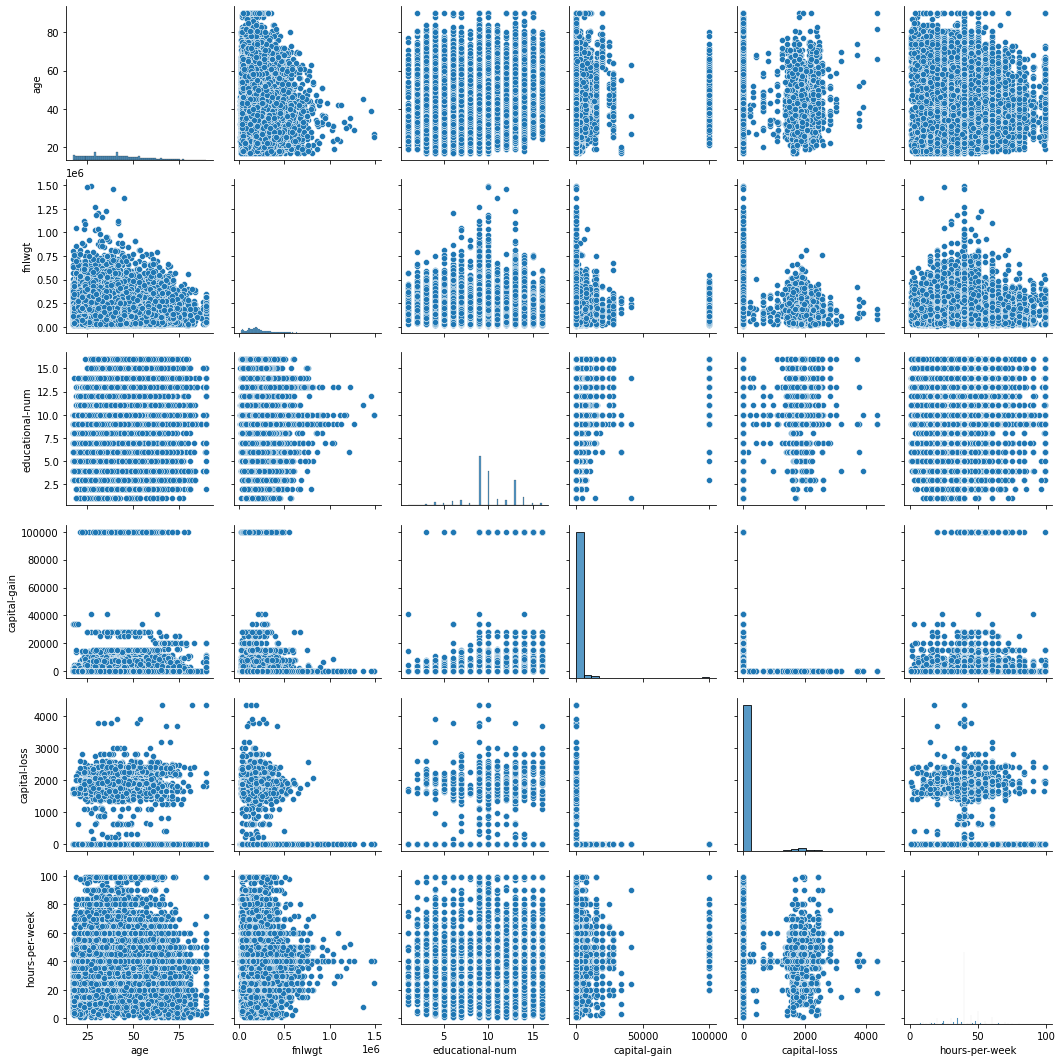

In [123]:
sns.pairplot(adult)

## Pre-Processing 

In [762]:
# detect NaNs 
adult.isna().sum()

age                   0
workclass          2799
fnlwgt                0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Detect & delete duplictaes

In [763]:
adult.duplicated().sum()

52

In [764]:
adult.drop_duplicates(inplace=True)
adult.reset_index(drop=True,inplace=True) # drop -> to avoid orginal index as a new column
adult.duplicated().sum()

0

In [765]:
adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [766]:
# drop unnecessary columns ( education )
adult = adult.drop(columns=['education'],axis=1)
adult.shape

KeyError: "['education'] not found in axis"

In [308]:
## detect duplicates again

adult.duplicated().sum()

0

## Train-test-split

In [767]:
X = adult.drop('income',axis=1)
y = adult['income']
X.shape , y.shape

((48790, 13), (48790,))

In [768]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,
                                                       shuffle=True
                                                       ,stratify = y,random_state=42) # random_state -> to split in the same way

In [769]:
X_test.shape

(9758, 13)

In [770]:
X_train.shape

(39032, 13)

In [771]:
y_train.shape

(39032,)

In [772]:
y_train.value_counts(normalize=True)

<=50K    0.760581
>50K     0.239419
Name: income, dtype: float64

In [773]:
y_test.value_counts(normalize=True)

<=50K    0.760607
>50K     0.239393
Name: income, dtype: float64

In [774]:
adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Handle NaNs

* train Data 

In [775]:
X_train.isna().sum()

age                   0
workclass          2233
fnlwgt                0
educational-num       0
marital-status        0
occupation         2241
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      674
dtype: int64

In [776]:
(X_train.isna().sum() / X_train.shape[0]) * 100

age                0.000000
workclass          5.720947
fnlwgt             0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.741443
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.726788
dtype: float64

In [777]:
X_train.shape

(39032, 13)

In [778]:
clean_indices = X_train['native-country'].dropna().index
clean_indices.shape

(38358,)

In [779]:
y_train = y_train.loc[clean_indices]
y_train.reset_index(inplace=True,drop=True)
y_train.shape

(38358,)

In [780]:
# drop NaNs ('native-country')
X_train = X_train.loc[clean_indices]
X_train.reset_index(inplace=True,drop=True)
X_train.isna().sum()

age                   0
workclass          2198
fnlwgt                0
educational-num       0
marital-status        0
occupation         2206
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
dtype: int64

In [781]:
X_train.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,44,Self-emp-not-inc,460259,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
1,22,State-gov,125010,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,20,United-States
2,29,Local-gov,188909,13,Never-married,Prof-specialty,Own-child,Black,Female,0,0,42,United-States
3,22,Local-gov,134181,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,50,United-States
4,50,Private,240374,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [782]:
# impute NaNs ('workclass' , 'occupation')

sm_imputer = SimpleImputer(strategy='most_frequent')
sm_imputer.fit_transform(X_train[['workclass']])

array([['Self-emp-not-inc'],
       ['State-gov'],
       ['Local-gov'],
       ...,
       ['Self-emp-not-inc'],
       ['Private'],
       ['Private']], dtype=object)

In [783]:
mode_workclass = sm_imputer.statistics_[0]
mode_workclass

'Private'

In [784]:
X_train['workclass'] = X_train['workclass'].fillna(mode_workclass)
X_train['workclass'].isna().sum()

0

In [785]:
sm_imputer.fit_transform(X_train[['occupation']])
mode_occupation = sm_imputer.statistics_[0]
mode_occupation

'Craft-repair'

In [786]:
X_train['occupation'] = X_train['occupation'].fillna(mode_occupation)
X_train['occupation'].isna().sum()

0

In [787]:
(X_train.isna().sum() / X_train.shape[0]) * 100

age                0.0
workclass          0.0
fnlwgt             0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
dtype: float64

## Handle NaNs

* Test Data 

In [788]:
X_test.isna().sum()

age                  0
workclass          562
fnlwgt               0
educational-num      0
marital-status       0
occupation         564
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     182
dtype: int64

In [789]:
(X_test.isna().sum() / X_test.shape[0]) * 100

age                0.000000
workclass          5.759377
fnlwgt             0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.779873
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.865136
dtype: float64

In [790]:
X_test.shape

(9758, 13)

In [791]:
clean_indices = X_test['native-country'].dropna().index
clean_indices.shape

(9576,)

In [792]:
y_test = y_test.loc[clean_indices]
y_test.reset_index(inplace=True,drop=True)
y_test.shape

(9576,)

In [793]:
# drop NaNs ('native-country')
X_test = X_test.loc[clean_indices]
X_test.reset_index(inplace=True,drop=True)
X_test.isna().sum()

age                  0
workclass          551
fnlwgt               0
educational-num      0
marital-status       0
occupation         553
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
dtype: int64

In [794]:
X_test.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,34,Private,149943,9,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,Japan
1,49,Private,32212,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,43,United-States
2,63,Self-emp-not-inc,159715,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
3,34,Local-gov,108247,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
4,53,Private,30447,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States


In [795]:
# impute NaNs ('workclass' , 'occupation')

sm_imputer = SimpleImputer(strategy='most_frequent')
sm_imputer.fit(X_train[['workclass']])
sm_imputer.transform(X_test[['workclass']])

array([['Private'],
       ['Private'],
       ['Self-emp-not-inc'],
       ...,
       ['Private'],
       ['Self-emp-not-inc'],
       ['Self-emp-inc']], dtype=object)

In [796]:
mode_workclass = sm_imputer.statistics_[0]
mode_workclass

'Private'

In [797]:
X_test['workclass'] = X_test['workclass'].fillna(mode_workclass)
X_test['workclass'].isna().sum()

0

In [798]:
sm_imputer.fit(X_train[['occupation']])
sm_imputer.transform(X_test[['occupation']])
mode_occupation = sm_imputer.statistics_[0]
mode_occupation

'Craft-repair'

In [799]:
X_test['occupation'] = X_test['occupation'].fillna(mode_occupation)
X_test['occupation'].isna().sum()

0

In [800]:
(X_test.isna().sum() / X_test.shape[0]) * 100

age                0.0
workclass          0.0
fnlwgt             0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
dtype: float64

In [801]:
X_test.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [802]:
X_test.shape

(9576, 13)

In [803]:
clean_indices = X_test['native-country'].dropna().index
clean_indices.shape

(9576,)

In [804]:
y_test = y_test.loc[clean_indices]
y_test.reset_index(inplace=True,drop=True)
y_test.shape

(9576,)

In [805]:
# drop NaNs ('native-country')
X_test = X_test.loc[clean_indices]
X_test.reset_index(inplace=True,drop=True)
X_test.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [806]:
X_test.shape

(9576, 13)

## Outliers

* Train Data

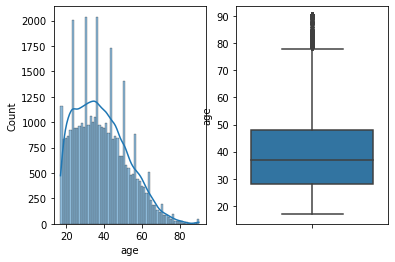

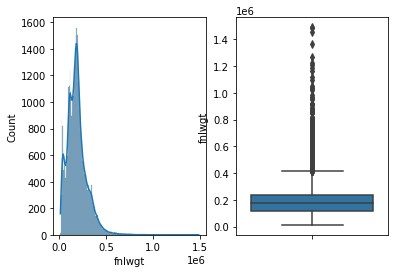

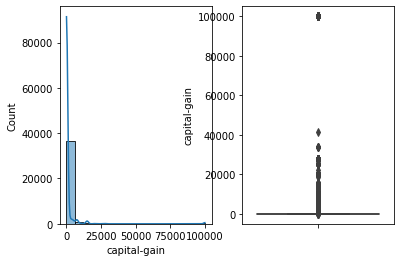

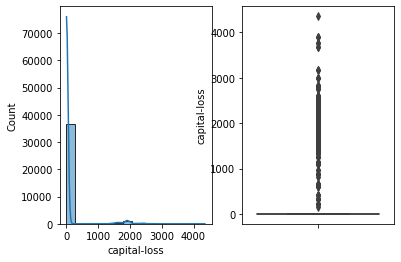

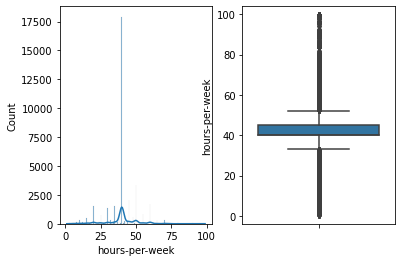

In [807]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[col])
    plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

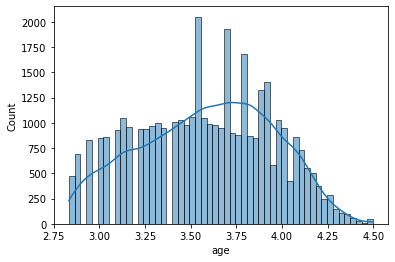

In [808]:
X_train['age'] = np.log(X_train['age'])
sns.histplot(X_train['age'],kde=True)

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

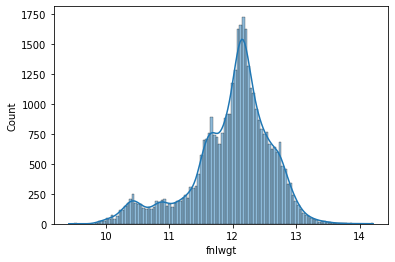

In [809]:
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
sns.histplot(X_train['fnlwgt'],kde=True)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

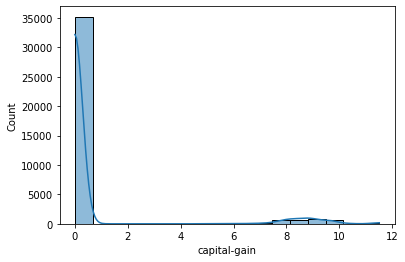

In [810]:
X_train['capital-gain'] = np.log1p(X_train['capital-gain'])
sns.histplot(X_train['capital-gain'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

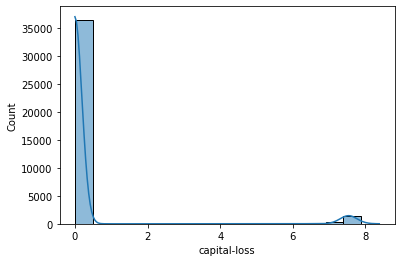

In [811]:
X_train['capital-loss'] = np.log1p(X_train['capital-loss'])
sns.histplot(X_train['capital-loss'],kde=True)

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='hours-per-week'>

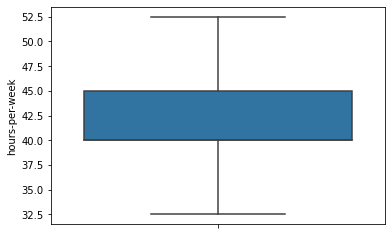

In [812]:
def handle_outliers(data):
    q1 = np.percentile(data,25)
    q2 = np.percentile(data,50)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub ] = ub
    data[data < lb ] = lb
    return data

X_train['hours-per-week'] = handle_outliers(X_train['hours-per-week'])
sns.boxplot(y =X_train['hours-per-week'])

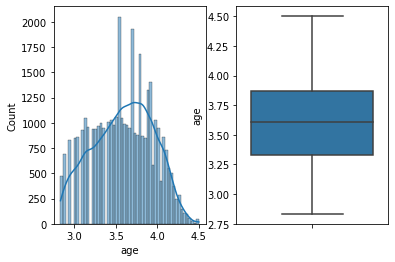

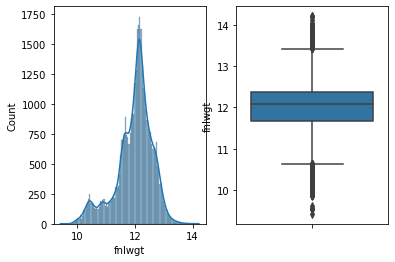

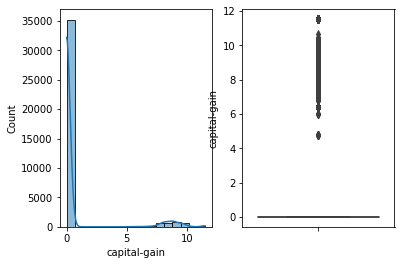

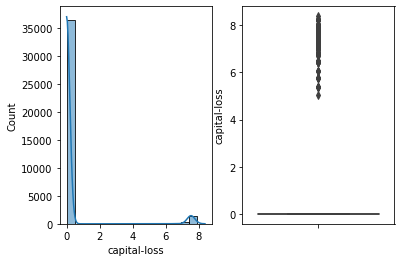

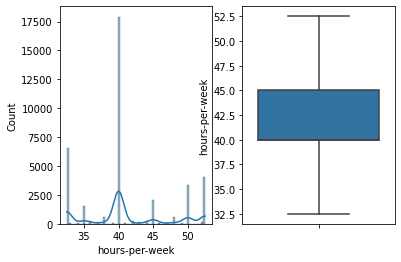

In [813]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[col])
    plt.show()

## Outliers
* Test Data

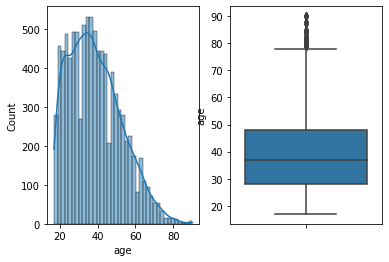

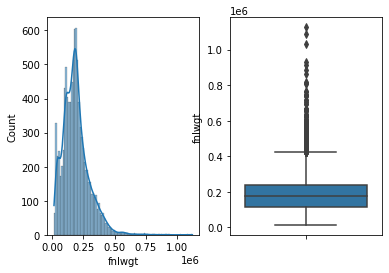

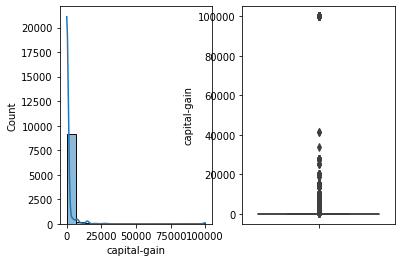

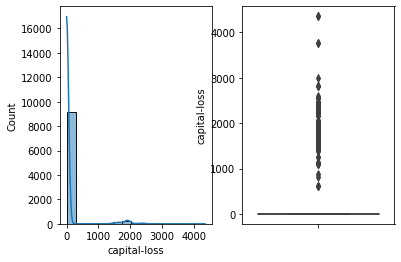

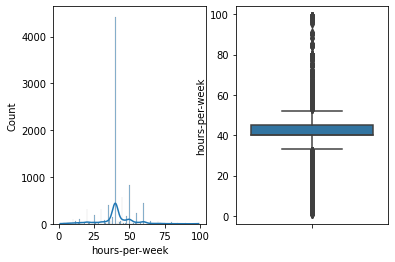

In [695]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_test[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_test[col])
    plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

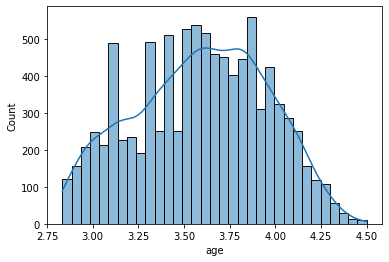

In [696]:
X_test['age'] = np.log(X_test['age'])
sns.histplot(X_test['age'],kde=True)

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

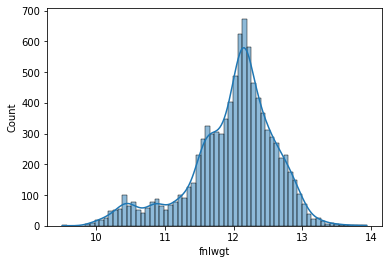

In [697]:
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])
sns.histplot(X_test['fnlwgt'],kde=True)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

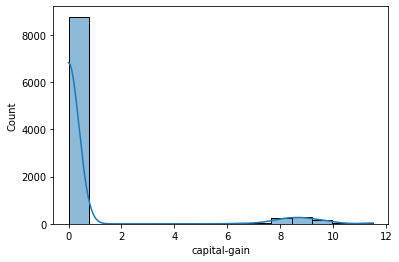

In [698]:
X_test['capital-gain'] = np.log1p(X_test['capital-gain'])
sns.histplot(X_test['capital-gain'],kde=True)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

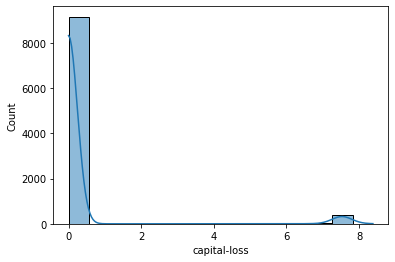

In [699]:
X_test['capital-loss'] = np.log1p(X_test['capital-loss'])
sns.histplot(X_test['capital-loss'],kde=True)

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='hours-per-week'>

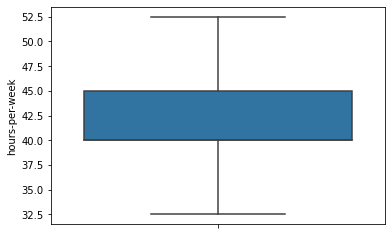

In [700]:
def handle_outliers(data):
    q1 = np.percentile(data,25)
    q2 = np.percentile(data,50)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub ] = ub
    data[data < lb ] = lb
    return data

X_test['hours-per-week'] = handle_outliers(X_test['hours-per-week'])
sns.boxplot(y =X_test['hours-per-week'])

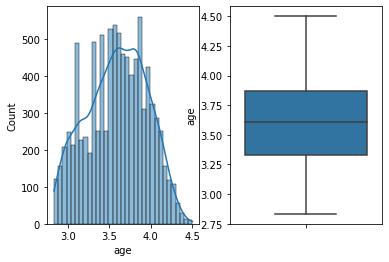

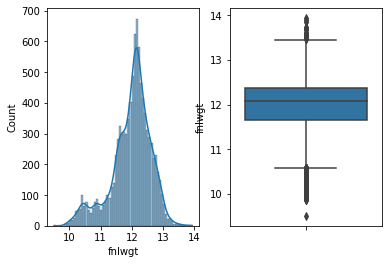

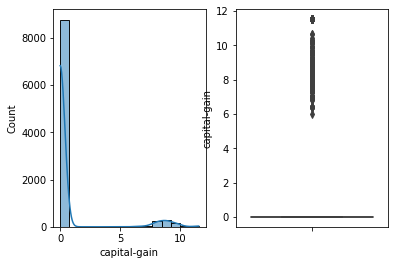

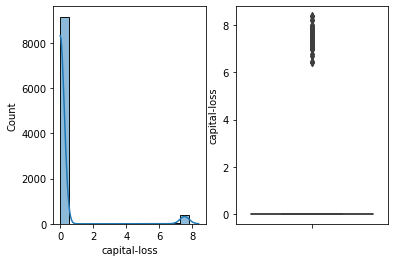

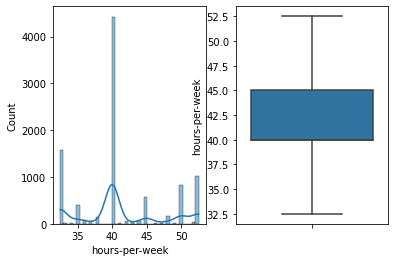

In [701]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_test[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_test[col])
    plt.show()

## Encoding

* Train Data

In [702]:
X_train.select_dtypes('object').head()

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country
0,Self-emp-not-inc,13,Married-civ-spouse,Sales,Husband,White,Male,United-States
1,State-gov,13,Never-married,Prof-specialty,Own-child,White,Female,United-States
2,Local-gov,13,Never-married,Prof-specialty,Own-child,Black,Female,United-States
3,Local-gov,9,Never-married,Handlers-cleaners,Other-relative,White,Male,United-States
4,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [703]:
X_train['workclass'].nunique(), X_train['workclass'].unique()

(8,
 array(['Self-emp-not-inc', 'State-gov', 'Local-gov', 'Private',
        'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
       dtype=object))

In [704]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [705]:
X_train_cat = X_train.select_dtypes('O')
for cat in X_train_cat:
    print(cat, X_train[cat].nunique())
print('income',y_train.nunique())    

workclass 8
educational-num 16
marital-status 7
occupation 14
relationship 6
race 5
gender 2
native-country 41
income 2


In [706]:
cat_7 = ['marital-status','relationship','race','gender']

In [707]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

for cat in cat_7:
    encoding = ohe.fit_transform(X_train[cat_7])
    cat_7_encoding = pd.DataFrame(encoding.toarray(),columns=ohe.get_feature_names())
    cat_7_encoding = pd.concat([cat_7_encoding],axis=1)
cat_7_encoding    

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,x1_Wife,x2_Asian-Pac-Islander,x2_Black,x2_Other,x2_White,x3_Male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38353,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
38355,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
38356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [708]:
ohe = OneHotEncoder(drop='first')
encoding_y = ohe.fit_transform(pd.DataFrame(y_train))
y_train_encoder = pd.DataFrame(encoding_y.toarray(),columns=ohe.get_feature_names())
y_train_encoder.rename(columns={'x0_>50K':'income'},inplace=True)
y_train_encoder

,income
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
38353,0.0
38354,1.0
38355,0.0
38356,0.0


In [709]:
y_train = pd.concat([y_train_encoder])
y_train

,income
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
38353,0.0
38354,1.0
38355,0.0
38356,0.0


In [710]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [711]:
workclass_encoding = b_encoder.fit_transform(X_train['workclass'])
workclass_encoding

,workclass_0,workclass_1,workclass_2,workclass_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,1
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
38353,0,1,0,0
38354,0,1,0,0
38355,0,0,0,1
38356,0,1,0,0


In [712]:
occupation_encoding = b_encoder.fit_transform(X_train['occupation'])
occupation_encoding

,occupation_0,occupation_1,occupation_2,occupation_3
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
38353,0,1,0,0
38354,0,1,1,1
38355,0,0,0,1
38356,0,1,0,0


In [713]:
country_encoding = b_encoder.fit_transform(X_train['native-country'])
country_encoding

,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
38353,0,0,0,0,0,1
38354,0,0,0,0,0,1
38355,0,0,0,0,0,1
38356,0,0,0,0,0,1


In [714]:
X_train_encoding = pd.concat([cat_7_encoding,workclass_encoding,occupation_encoding,country_encoding],axis=1)
X_train_encoding

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38353,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
38354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1
38355,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
38356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [715]:
cat_cols = cat_cols.drop('income')
cat_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [716]:
X_train.drop(cat_cols,axis=1,inplace=True)

In [717]:
X_train

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,3.784190,13.039545,0.000000,0.000000,50.0
1,3.091042,11.736149,0.000000,0.000000,32.5
2,3.367296,12.149021,0.000000,0.000000,42.0
3,3.091042,11.806945,0.000000,0.000000,50.0
4,3.912023,12.389951,0.000000,0.000000,50.0
...,...,...,...,...,...
38353,3.871201,11.947496,0.000000,0.000000,35.0
38354,3.610918,11.517993,0.000000,0.000000,40.0
38355,4.304065,11.687962,0.000000,7.673223,32.5
38356,3.806662,12.821963,0.000000,0.000000,40.0


In [718]:
X_train = pd.concat([X_train,X_train_encoding],axis=1)
X_train

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,3.784190,13.039545,0.000000,0.000000,50.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,3.091042,11.736149,0.000000,0.000000,32.5,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3.367296,12.149021,0.000000,0.000000,42.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,3.091042,11.806945,0.000000,0.000000,50.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,3.912023,12.389951,0.000000,0.000000,50.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38353,3.871201,11.947496,0.000000,0.000000,35.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
38354,3.610918,11.517993,0.000000,0.000000,40.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1
38355,4.304065,11.687962,0.000000,7.673223,32.5,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
38356,3.806662,12.821963,0.000000,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [737]:
X_train.shape

(38358, 35)

In [739]:
y_train.shape

(38358, 1)

## Encoding 
* Test Data

In [814]:
X_test.select_dtypes('object').head()

,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country
0,Private,9,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,Japan
1,Private,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
2,Self-emp-not-inc,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
3,Local-gov,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
4,Private,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,United-States


In [815]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [816]:
X_test_cat = X_test.select_dtypes('O')
for cat in X_test_cat:
    print(cat, X_test[cat].nunique())
print('income',y_test.nunique())    

workclass 8
educational-num 16
marital-status 7
occupation 14
relationship 6
race 5
gender 2
native-country 40
income 2


In [817]:
cat_7 = ['marital-status','relationship','race','gender']

In [818]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

for cat in cat_7:
    ohe.fit(X_test[cat_7])
    encoding = ohe.transform(X_test[cat_7])
    cat_7_encoding = pd.DataFrame(encoding.toarray(),columns=ohe.get_feature_names())
    cat_7_encoding = pd.concat([cat_7_encoding],axis=1)
cat_7_encoding    

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,x1_Wife,x2_Asian-Pac-Islander,x2_Black,x2_Other,x2_White,x3_Male
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9572,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9573,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9574,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [823]:
ohe = OneHotEncoder(drop='first')
ohe.fit(pd.DataFrame(y_train))
encoding_y = ohe.transform(pd.DataFrame(y_test))
y_test_encoder = pd.DataFrame(encoding_y.toarray(),columns=ohe.get_feature_names())
y_test_encoder.rename(columns={'x0_>50K':'income'},inplace=True)
y_test_encoder

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [820]:
y_test = pd.concat([y_test_encoder])
y_test

,x0_>50K
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
9571,1.0
9572,0.0
9573,0.0
9574,0.0


In [821]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [824]:
b_encoder.fit(X_train['workclass'])
workclass_encoding = b_encoder.transform(X_test['workclass'])
workclass_encoding

,workclass_0,workclass_1,workclass_2,workclass_3
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
9571,0,0,0,1
9572,0,1,0,0
9573,0,1,0,0
9574,0,0,0,1


In [825]:
b_encoder.fit(X_train['occupation'])
occupation_encoding = b_encoder.transform(X_test['occupation'])
occupation_encoding

,occupation_0,occupation_1,occupation_2,occupation_3
0,0,1,0,1
1,0,1,0,0
2,1,1,0,0
3,0,1,0,0
4,1,1,0,0
...,...,...,...,...
9571,0,0,1,0
9572,0,1,1,0
9573,0,1,1,1
9574,0,1,1,1


In [827]:
b_encoder.fit(X_train['native-country'])
country_encoding = b_encoder.transform(X_test['native-country'])
country_encoding

,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
9571,0,0,0,0,0,1
9572,0,0,0,0,0,1
9573,0,0,0,0,0,1
9574,0,0,0,0,0,1


In [828]:
X_test_encoding = pd.concat([cat_7_encoding,workclass_encoding,occupation_encoding,country_encoding],axis=1)
X_test_encoding

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
9572,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,1
9573,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,1,0,0,0,0,0,1
9574,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1


In [829]:
cat_cols = cat_cols.drop('income')
cat_cols

Index(['workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [830]:
X_test.drop(cat_cols,axis=1,inplace=True)

In [831]:
X_test

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,34,149943,0,0,40
1,49,32212,0,0,43
2,63,159715,0,0,40
3,34,108247,0,0,45
4,53,30447,0,0,50
...,...,...,...,...,...
9571,54,83311,0,0,30
9572,28,199903,0,0,20
9573,20,358355,0,0,35
9574,57,217692,0,0,38


In [832]:
X_test = pd.concat([X_test,X_test_encoding],axis=1)
X_test

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,34,149943,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0,1,0,1,1,0,0,0,0,0
1,49,32212,0,0,43,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,63,159715,0,0,40,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,34,108247,0,0,45,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,53,30447,0,0,50,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,54,83311,0,0,30,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
9572,28,199903,0,0,20,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
9573,20,358355,0,0,35,0.0,0.0,0.0,1.0,0.0,...,0,1,1,1,0,0,0,0,0,1
9574,57,217692,0,0,38,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1


In [833]:
X_test.shape

(9576, 35)

In [834]:
y_test.shape

(9576, 1)

## Imbalanced

In [445]:
y_train.value_counts()

income
0.0       29182
1.0        9176
dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

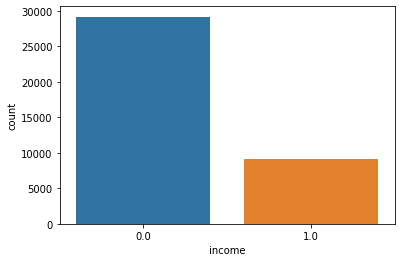

In [446]:
sns.countplot(x=y_train['income'])

In [447]:
X_train

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,3.784190,13.039545,0.000000,0.000000,50.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,3.091042,11.736149,0.000000,0.000000,32.5,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3.367296,12.149021,0.000000,0.000000,42.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,3.091042,11.806945,0.000000,0.000000,50.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,3.912023,12.389951,0.000000,0.000000,50.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38353,3.871201,11.947496,0.000000,0.000000,35.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
38354,3.610918,11.517993,0.000000,0.000000,40.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1
38355,4.304065,11.687962,0.000000,7.673223,32.5,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
38356,3.806662,12.821963,0.000000,0.000000,40.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [448]:
y_train

,income
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
38353,0.0
38354,1.0
38355,0.0
38356,0.0


In [449]:
# UnderSampling

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
under_sampler

RandomUnderSampler()

In [450]:
X_train_resampled , y_train_resampled = under_sampler.fit_resample(X = X_train , y=y_train)
X_train_resampled

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,3.688879,12.632957,0.000000,0.0,35.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
1,3.367296,12.218782,0.000000,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,0,0,0,0,0,1
2,4.060443,10.414813,0.000000,0.0,35.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
3,3.178054,11.840559,0.000000,0.0,32.5,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,3.988984,12.180832,0.000000,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18347,4.094345,10.235880,0.000000,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
18348,3.583519,12.143383,8.947546,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
18349,3.737670,12.031410,0.000000,0.0,40.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1
18350,3.295837,12.339169,0.000000,0.0,45.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,1,0,0,0,0,0,1


In [451]:
y_train_resampled.value_counts()

income
1.0       9176
0.0       9176
dtype: int64

In [473]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_model = DecisionTreeClassifier()
rf_model

DecisionTreeClassifier()

In [474]:
rf_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [835]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999455100261552

In [837]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.5920008354218881

## Scaling

In [839]:
X_train.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,38358.000000,38358.000000,38358.000000,38358.000000,38358.000000
mean,3.590378,11.982364,0.724762,0.356882,41.175153
std,0.362085,0.632273,2.439949,1.598652,6.187274
min,2.833213,9.416134,0.000000,0.000000,32.500000
25%,3.332205,11.674910,0.000000,0.000000,40.000000
50%,3.610918,12.090724,0.000000,0.000000,40.000000
75%,3.871201,12.378117,0.000000,0.000000,45.000000
max,4.499810,14.214555,11.512925,8.379539,52.500000


In [842]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
X_train[['age','fnlwgt', 'hours-per-week']] = std_scaler.fit_transform(X_train[['age','fnlwgt', 'hours-per-week']])
X_test[['age','fnlwgt', 'hours-per-week']] = std_scaler.transform(X_test[['age','fnlwgt', 'hours-per-week']])


In [843]:
X_train.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,3.835800e+04,3.835800e+04,38358.000000,38358.000000,3.835800e+04
mean,5.220057e-16,1.835356e-15,0.724762,0.356882,-4.806972e-16
std,1.000013e+00,1.000013e+00,2.439949,1.598652,1.000013e+00
min,-2.091153e+00,-4.058791e+00,0.000000,0.000000,-1.402114e+00
25%,-7.130299e-01,-4.862738e-01,0.000000,0.000000,-1.899330e-01
50%,5.672615e-02,1.713829e-01,0.000000,0.000000,-1.899330e-01
75%,7.755810e-01,6.259284e-01,0.000000,0.000000,6.181878e-01
max,2.511684e+00,3.530469e+00,11.512925,8.379539,1.830369e+00


In [845]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999455100261552

In [846]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.6574770258980785

In [847]:
robust_scaler = RobustScaler()
X_train[['capital-gain','capital-loss']] = robust_scaler.fit_transform(X_train[['capital-gain','capital-loss']])
X_test[['capital-gain','capital-loss']] = robust_scaler.transform(X_test[['capital-gain','capital-loss']])

In [848]:
X_train.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,3.835800e+04,3.835800e+04,38358.000000,38358.000000,3.835800e+04
mean,5.220057e-16,1.835356e-15,0.724762,0.356882,-4.806972e-16
std,1.000013e+00,1.000013e+00,2.439949,1.598652,1.000013e+00
min,-2.091153e+00,-4.058791e+00,0.000000,0.000000,-1.402114e+00
25%,-7.130299e-01,-4.862738e-01,0.000000,0.000000,-1.899330e-01
50%,5.672615e-02,1.713829e-01,0.000000,0.000000,-1.899330e-01
75%,7.755810e-01,6.259284e-01,0.000000,0.000000,6.181878e-01
max,2.511684e+00,3.530469e+00,11.512925,8.379539,1.830369e+00


In [849]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999455100261552

In [850]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.6574770258980785